# Summarizing metrics from single horizontal lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [4]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
ss = ss.merge(seg[['folder', 'horiz_segments']], on='folder', suffixes=['', '_manual'], how='left')

Independents: ['folder', 'fullpath', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', '

In [5]:
vs,uv = me.importStillsSummary(file='videoSummary.csv', diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
vs = vs.merge(seg[['folder', 'wetting', 'horiz_segments']], on='folder', suffixes=['', ''], how='left')

Independents: ['folder', 'fullpath', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['projectionN', 'projShiftN', 'vertDispBotN', 'vertDispTopN', 'vertDispMidN']


# horizontal

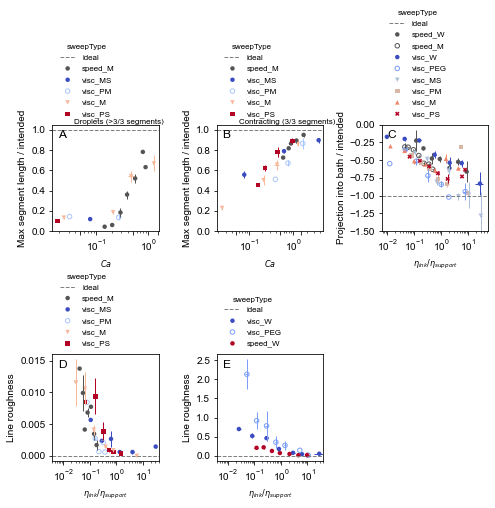

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [137]:
fig,axs = plt.subplots(2,3,figsize=(7, 7))

ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca.sort_values(by='sigma')
ss0 = ss.copy()
ss0 = ss0[ss0.sigma==0]
vsca = vs.copy()
vsca = vsca.sort_values(by='sigma')
for ssi in [ssca, ss0, vsca]:
    mp.simplifyType(ssi)

fs = 8
ms = 20

# rupture
kwargs = {'logx':True, 'legend':True, 'units':u, 'dx':0.15, 'yideal':1, 'fontsize':fs, 'markersize':ms}
mp.sweepTypeSS(ssca[ssca.horiz_segments_manual>3], 'int_Ca', 'horiz_maxlenN', ax=axs[0][0], **kwargs)
axs[0][0].text(0.2, 1.0, 'Droplets (>3/3 segments)', fontsize=fs, transform=axs[0][0].transAxes, horizontalalignment='left', verticalalignment='bottom')

# shrinkage
mp.sweepTypeSS(ssca[ssca.horiz_segments_manual==3], 'int_Ca', 'horiz_maxlenN', ax=axs[0][1], **kwargs)
axs[0][1].text(0.2, 1.0, 'Contracting (3/3 segments)', fontsize=fs, transform=axs[0][1].transAxes, horizontalalignment='left', verticalalignment='bottom')

for ax in [axs[0][0], axs[0][1]]:
    ax.set_ylim([0, 1.05])
    mp.setSquare(ax)
    ax.set_ylabel('Max segment length / intended')
    

# projectionN
kwargs['yideal'] = -1
mp.sweepTypeSS(vsca[vsca.projectionN_N>5], 'viscRatio', 'projectionN', ax=axs[0][2], **kwargs)
for ax in [axs[0][2]]:
    ax.set_ylim([-1.5, 0])
    mp.setSquare(ax)
    ax.set_ylabel('Projection into bath / intended')

# roughness
kwargs['yideal'] = 0
mp.sweepTypeSS(ssca[ssca.horiz_segments_manual==3], 'viscRatio', 'horiz_roughness', ax=axs[1][0], **kwargs)
mp.sweepTypeSS(ss0[ss0.horiz_segments_manual==3], 'viscRatio', 'horiz_roughness', ax=axs[1][1], **kwargs)
for ax in [axs[1][0], axs[1][1]]:
    ax.set_ylabel('Line roughness')
    ax.set_xlim([4*10**-3, 4*10**1])
    ax.set_xticks([ 10**-2, 10**-1, 10**0, 10**1])
    mp.setSquare(ax)



for ax in [axs[0][2], axs[1][0],axs[1][1]]:
    ax.set_xlabel('${\eta}_{ink}/{\eta}_{support}$', fontsize=fs)
for ax in [axs[0][0], axs[0][1]]:
    ax.set_xlabel('$Ca$', fontsize=fs)
    
axs[1][2].remove()

fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'horiz_measures.svg'), bbox_inches='tight', dpi=300)

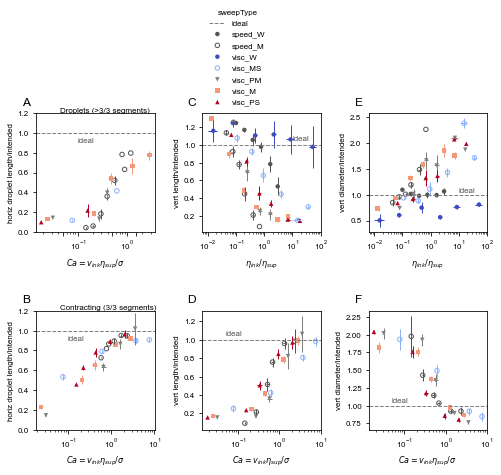

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [52]:
fig,axs = plt.subplots(2,3,figsize=(7, 7))

ssca = ss.copy()
# ssca = ssca[ssca.sigma>0]
ssca = ssca[ssca.ink_type!='PEGDA_40']

ss0 = ss.copy()
ss0 = ss0[ss0.sigma==0]
vsca = vs.copy()

for ssi in [ssca, ss0, vsca]:
    mp.simplifyType(ssi)
    ssi.sort_values(by=['sigma', 'sweepType'], inplace=True)

fs = 8
ms = 20

# rupture
kwargs = {'logx':True, 'legend':False, 'units':u, 'dx':0.15, 'yideal':1, 'fontsize':fs, 'markersize':ms}
ss1 = ssca.copy()
ss1 = ss1[ss1.sigma>0]
ss1.loc[ss1.horiz_segments_manual<=3, 'int_Ca'] = 0
ss1 = pd.concat([ss1, 
                    pd.DataFrame([{'int_Ca':0,'vRatio':2, 'horiz_maxlenN':0, 'sweepType':'speed_W', 'sigma':0, 'ink_type':'water'}, 
                                  {'int_Ca':0,'vRatio':1,  'horiz_maxlenN':0, 'sweepType':'visc_W', 'ink_type':'water', 'sigma':0}])])
ss1.sort_values(by=['sigma', 'sweepType'], inplace=True)
mp.sweepTypeSS(ss1, 'int_Ca', 'horiz_maxlenN', ax=axs[0][0], **kwargs)
axs[0][0].text(0.2, 1.0, 'Droplets (>3/3 segments)', fontsize=fs, transform=axs[0][0].transAxes, horizontalalignment='left', verticalalignment='bottom')

# shrinkage
ss1 = ssca.copy()
ss1.loc[ss1.horiz_segments_manual>3, 'int_Ca'] = 0
ss1.sort_values(by=['sigma', 'sweepType'], inplace=True)
mp.sweepTypeSS(ss1, 'int_Ca', 'horiz_maxlenN', ax=axs[1][0], **kwargs)
axs[1][0].text(0.2, 1.0, 'Contracting (3/3 segments)', fontsize=fs, transform=axs[1][0].transAxes, horizontalalignment='left', verticalalignment='bottom')

for ax in [axs[0][0], axs[1][0]]:
    ax.set_ylim([0, 1.2])
    mp.setSquare(ax)
    
for i,yvar in enumerate(['vert_hN', 'vert_meanTN']):
    for j,xvar in enumerate(['viscRatio', 'int_Ca']):
        kwargs = {'fontsize':fs, 'markersize':ms, 'fig':fig, 'logx':True, 'logy':False, 'ax':axs[j][i+1], 'legend':((i==0)&(j==0)), 'dx':0.2}
        mp.sweepTypeSS(ssca, xvar, yvar, yideal=1, **kwargs)


axs[0][0].text(0.1, 0.9, 'ideal', color='#555555', fontsize=fs)
axs[0][1].text(10, 1.05, 'ideal', color='#555555', fontsize=fs)
axs[0][2].text(10, 1.05, 'ideal', color='#555555', fontsize=fs)
axs[1][0].text(0.1, 0.9, 'ideal', color='#555555', fontsize=fs)
axs[1][1].text(0.05, 1.05, 'ideal', color='#555555', fontsize=fs)
axs[1][2].text(0.05, 1.05, 'ideal', color='#555555', fontsize=fs)

fig.tight_layout()
mp.subFigureLabels(axs, horiz=False, inside=False)
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'lengths.svg'), bbox_inches='tight', dpi=300)

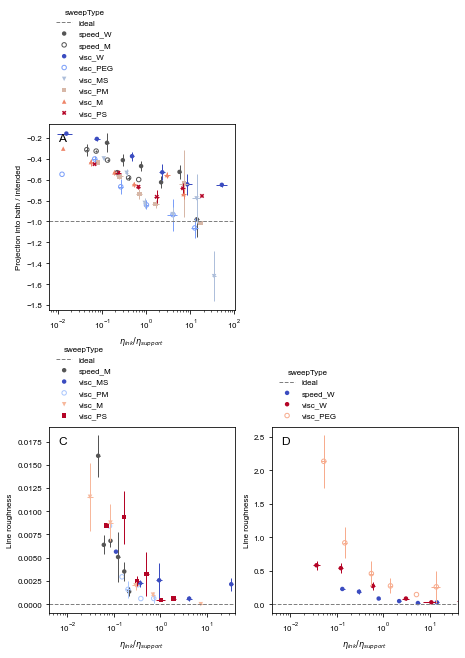

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [41]:
fig,axs = plt.subplots(2,2,figsize=(6.5, 9))

ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca.sort_values(by='sigma')
ss0 = ss.copy()
ss0 = ss0[ss0.sigma==0]
vsca = vs.copy()
vsca = vsca.sort_values(by='sigma')
for ssi in [ssca, ss0, vsca]:
    mp.simplifyType(ssi)

fs = 8
ms = 20

kwargs = {'logx':True, 'legend':True, 'units':u, 'dx':0.2, 'yideal':1, 'fontsize':fs, 'markersize':ms}

# projectionN
kwargs['yideal'] = -1
mp.sweepTypeSS(vsca[vsca.projectionN_N>5], 'viscRatio', 'projectionN', ax=axs[0][0], **kwargs)
for ax in [axs[0][0]]:
#     ax.set_ylim([-1.5, 0])
    mp.setSquare(ax)
    ax.set_ylabel('Projection into bath / intended')

# roughness
kwargs['yideal'] = 0
mp.sweepTypeSS(ssca[ssca.horiz_segments_manual==3], 'viscRatio', 'horiz_roughness', ax=axs[1][0], **kwargs)
mp.sweepTypeSS(ss0[ss0.horiz_segments_manual==3], 'viscRatio', 'horiz_roughness', ax=axs[1][1], **kwargs)
for ax in [axs[1][0], axs[1][1]]:
    ax.set_ylabel('Line roughness')
    ax.set_xlim([4*10**-3, 4*10**1])
    ax.set_xticks([ 10**-2, 10**-1, 10**0, 10**1])
    mp.setSquare(ax)


for ax in [axs[0][0], axs[1][0],axs[1][1]]:
    ax.set_xlabel('${\eta}_{ink}/{\eta}_{support}$', fontsize=fs)
    
axs[0][1].remove()

fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'proj_roughness.svg'), bbox_inches='tight', dpi=300)

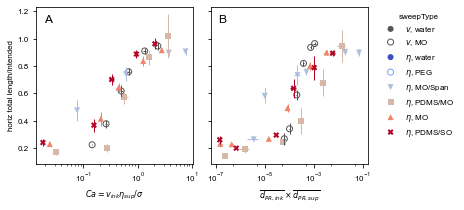

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [49]:
vs0 = vs.copy()
ss0 = ss.copy()
for ssi in [vs0, ss0]:
    mp.simplifyType(ssi)
    # ssi = ssi[ssi.sigma>0]
    ssi.sort_values(by='sigma', inplace=True)
    me.plainTypes(ssi, abbrev=True, incSweep=1)
    me.addRatios(ssi, ['dnorm'], operator='Prod')
fig,axs = plt.subplots(1,2, figsize=(6.5,4), sharey='row', sharex='col')
for j, yb in enumerate([[ss0, 'horiz_totlenN']]):
    for i,xvar in enumerate(['int_Ca', 'dnormProd']):
        mp.sweepTypeSS(yb[0], xvar, yb[1], logx=True, dx=0.2, ax=axs[i], legend=(i==1), legendloc='right', fontsize=8, set_ylabel=(i==0))
for ax in axs:
    mp.setSquare(ax)
plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'horiz_CaD_len.pdf'), bbox_inches='tight', dpi=300)

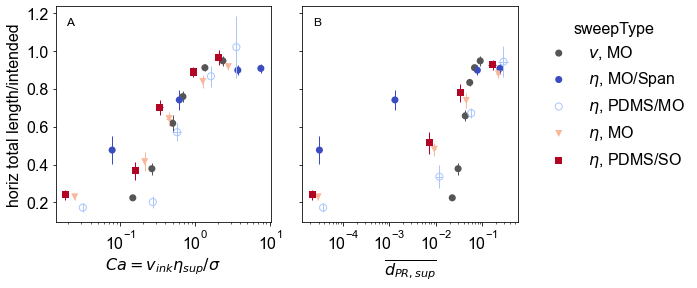

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [59]:
vs0 = vs.copy()
ss0 = ss.copy()
for ssi in [vs0, ss0]:
    mp.simplifyType(ssi)
    ssi.sort_values(by='sigma', inplace=True)
    me.plainTypes(ssi, abbrev=True, incSweep=1)
    me.addRatios(ssi, ['dnorm'], operator='Prod')
fig,axs = plt.subplots(1,2, figsize=(10,6), sharey='row', sharex='col')
for j, yb in enumerate([[ss0, 'horiz_totlenN']]):
    for i,xvar in enumerate(['int_Ca', 'sup_dnorm']):
        mp.sweepTypeSS(ss0[ss0.sigma>0], xvar, yb[1], logx=True, dx=0.2, ax=axs[i], legend=(i==1), legendloc='right', fontsize=16, markersize=50, set_ylabel=(i==0))
for ax in axs:
    mp.setSquare(ax)
plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_CaD_len.png'), bbox_inches='tight', dpi=300)

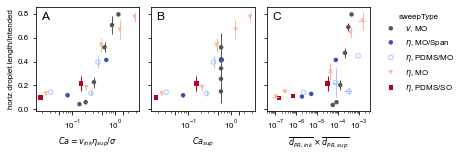

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [43]:
vs0 = vs.copy()
ss0 = ss.copy()
ss0 = ss0[ss0.sigma>0]
ss0 = ss0[ss0.horiz_segments>3]
for ssi in [vs0, ss0]:
    mp.simplifyType(ssi)
    # ssi = ssi[ssi.sigma>0]
    ssi.sort_values(by='sigma', inplace=True)
    me.plainTypes(ssi, abbrev=True, incSweep=1)
    me.addRatios(ssi, ['dnorm'], operator='Prod')
fig,axs = plt.subplots(1,3, figsize=(6.5,3), sharey='row', sharex='col')
for j, yb in enumerate([[ss0, 'horiz_maxlenN']]):
    for i,xvar in enumerate(['int_Ca', 'sup_Ca', 'dnormProd']):
        mp.sweepTypeSS(yb[0], xvar, yb[1], logx=True, dx=0.2, ax=axs[i], legend=(i==2), legendloc='right', fontsize=8, markersize=20, set_ylabel=(i==0))
for ax in axs:
    mp.setSquare(ax)
plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'horiz_droplet_len.pdf'), bbox_inches='tight', dpi=300)

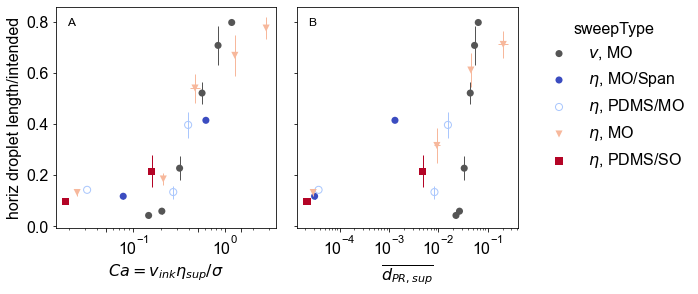

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [56]:
vs0 = vs.copy()
ss0 = ss.copy()
ss0 = ss0[ss0.sigma>0]
ss0 = ss0[ss0.horiz_segments>3]
for ssi in [vs0, ss0]:
    mp.simplifyType(ssi)
    # ssi = ssi[ssi.sigma>0]
    ssi.sort_values(by='sigma', inplace=True)
    me.plainTypes(ssi, abbrev=True, incSweep=1)
    me.addRatios(ssi, ['dnorm'], operator='Prod')
fig,axs = plt.subplots(1,2, figsize=(10,6), sharey='row', sharex='col')
for j, yb in enumerate([[ss0, 'horiz_maxlenN']]):
    for i,xvar in enumerate(['int_Ca', 'sup_dnorm']):
        mp.sweepTypeSS(yb[0], xvar, yb[1], logx=True, dx=0.2, ax=axs[i], legend=(i==1), legendloc='right', fontsize=16, markersize=50, set_ylabel=(i==0))
for ax in axs:
    mp.setSquare(ax)
plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_droplet_len.png'), bbox_inches='tight', dpi=300)

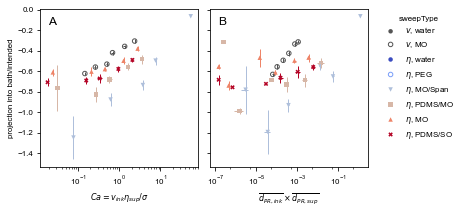

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [44]:
vs0 = vs.copy()
ss0 = ss.copy()
for ssi in [vs0, ss0]:
    mp.simplifyType(ssi)
    # ssi = ssi[ssi.sigma>0]
    ssi.sort_values(by='sigma', inplace=True)
    me.plainTypes(ssi, abbrev=True, incSweep=1)
    me.addRatios(ssi, ['dnorm'], operator='Prod')
fig,axs = plt.subplots(1,2, figsize=(6.5,4), sharey='row', sharex='col')
for j, yb in enumerate([[vs0, 'projectionN']]):
    for i,xvar in enumerate(['int_Ca', 'dnormProd']):
        mp.sweepTypeSS(yb[0], xvar, yb[1], logx=True, dx=0.2, ax=axs[i], legend=(i==1), legendloc='right', set_ylabel=(i==0), markersize=20, fontsize=8)
for ax in axs:
    mp.setSquare(ax)
plt.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'horiz_CaD_proj.pdf'), bbox_inches='tight', dpi=300)

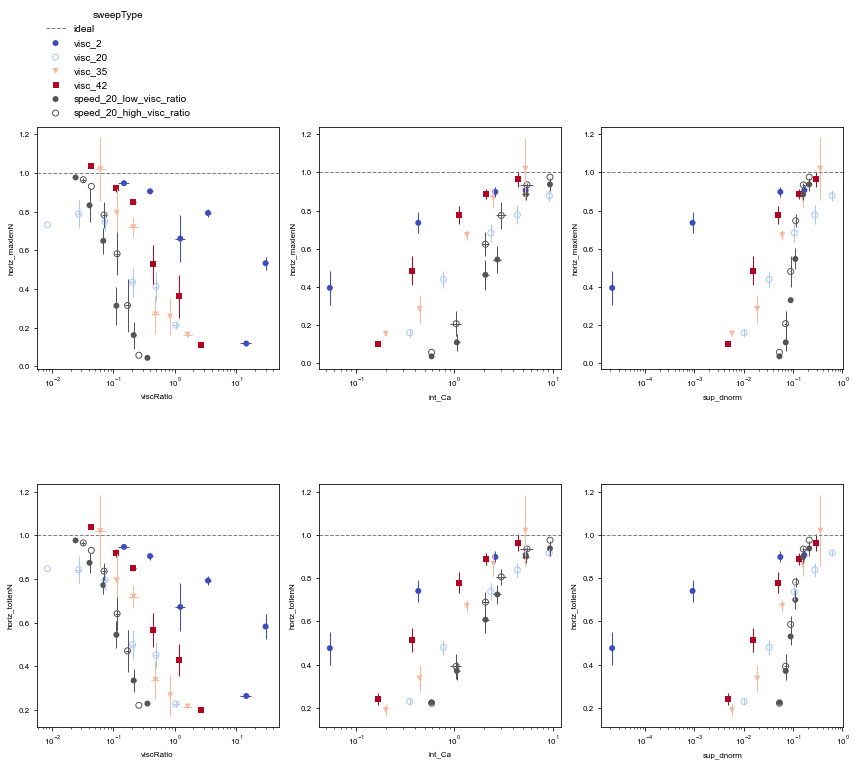

In [120]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(2,3,figsize=(12,12))
for j,s2 in enumerate(['viscRatio', 'int_Ca', 'sup_dnorm']):
    for i,s in enumerate(['horiz_maxlenN', 'horiz_totlenN']):
        mp.scatterSS(ss1[ss1.sweepType.str.startswith('visc')], s2, s, 'sweepType', logx=True, yideal=([1,1][i]), ax=axs[i][j], fig=fig, legend=(i==0 and j==0), dx=0.2)
        mp.scatterSS(ss1[ss1.sweepType.str.startswith('speed')], s2, s, 'sweepType', logx=True, ax=axs[i][j], fig=fig, legend=(i==0 and j==0), color='#555555', dx=0.2)
fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'horiz_totlenN'}, xlabel='ink_val', ylabel='sup_val'>)

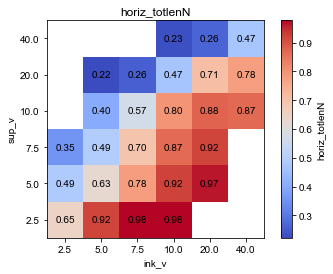

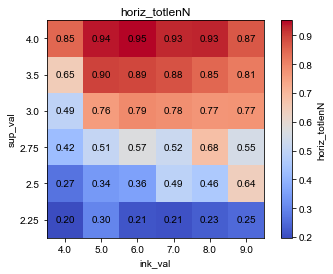

In [157]:
mp.colorMeshSS(ss[ss.sweepType=='speed_20_low_visc_ratio'], 'ink_v', 'sup_v', 'horiz_totlenN', dx=0, dy=0)
mp.colorMeshSS(ss[ss.sweepType=='visc_20'], 'ink_val', 'sup_val', 'horiz_totlenN', dx=0, dy=0)

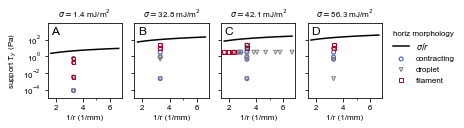

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [39]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
ss1['rInv'] = 2/ss1['dEst']
ss1 = ss1[ss1.horiz_segments_manual>0]
ss1['horiz_morphology'] = 'filament'
ss1.loc[ss1['horiz_totlenN']<0.9, 'horiz_morphology'] = 'contracting'
ss1.loc[ss1['horiz_segments_manual']>3,'horiz_morphology'] = 'droplet'
# ss1['morphology'] = ['droplet' if row['horiz_segments_manual']>3 else ('contracting') for i,row in ss1.iterrows()]
fig,axs = plt.subplots(1, len(ss1.sigma.unique()), figsize=(6.5, 200), sharex='row', sharey='row')
ss1.sort_values(by='sigma', inplace=True)
x = ss1.rInv.unique()
x.sort()
for i,sigma in enumerate(ss1.sigma.unique()):
    ss2 = ss1.copy()
    ss2 = ss2[ss2.sigma==sigma]
    ss2.sort_values(by='horiz_morphology', inplace=True)
    
    tst = sigma*x 
    axs[i].plot(x,tst, color='black', label='$\sigma/r$')
    mp.scatterSS(ss2, 'rInv', 'sup_tau0', 'horiz_morphology', dx=0, dy=0, logy=True
                 , ax = axs[i], legend=(i==len(ss1.sigma.unique())-1), legendloc='right', fontsize=8, markersize=15, empty=True)
    axs[i].set_xlabel('1/r (1/mm)')
    axs[i].set_ylabel('')
    axs[i].set_title(f'$\sigma=${sigma} mJ/m$^2$', fontsize=8)
for ax in axs:
    ax.set_ylim([10**-5,10**4])
    mp.setSquare(ax)
axs[0].set_ylabel(r'support $\tau_y$ (Pa)')
fig.tight_layout()
plt.subplots_adjust(wspace=0)
mp.subFigureLabels(axs, inside=True)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'morphology_cutoff.pdf'), bbox_inches='tight', dpi=300)

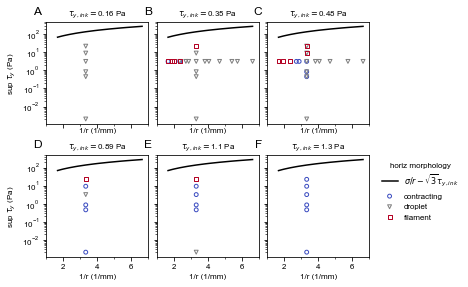

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [35]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_type=='mineral oil']
ss1['rInv'] = 2/ss1['dEst']
ss1['horiz_morphology'] = 'filament'
ss1 = ss1[ss1.horiz_segments_manual>0]
ss1.loc[ss1['horiz_totlenN']<0.9, 'horiz_morphology'] = 'contracting'
ss1.loc[ss1['horiz_segments_manual']>3,'horiz_morphology'] = 'droplet'
# ss1['morphology'] = ['droplet' if row['horiz_segments_manual']>3 else ('contracting') for i,row in ss1.iterrows()]
fig,axs = plt.subplots(2, 3, figsize=(6.5, 4), sharex=True, sharey=True)
ss1.sort_values(by='ink_tau0', inplace=True)
x = ss1.rInv.unique()
x.sort()

for i,tau in enumerate(ss1.ink_tau0.unique()):
    tst = sigma*x - np.sqrt(3)*tau
    ax = axs[int(i/3)][i%3]
    ax.plot(x,tst, color='black', label=r'$\sigma/r-\sqrt{3}\tau_{y,ink}$')
    ss2 = ss1.copy()
    ss2 = ss2[ss2.ink_tau0==tau]
    ss2 = pd.concat([ss2, 
                         pd.DataFrame([
                             {'rInv':0.1, 'sup_tau0':0.1, 'horiz_morphology':s, 'ink_tau0':tau} 
                             for s in ['droplet', 'filament', 'contracting']]
                             )])
    ss2.sort_values(by='horiz_morphology', inplace=True)
    mp.scatterSS(ss2, 'rInv', 'sup_tau0', 'horiz_morphology', dx=0, dy=0, logy=True
                 , ax = ax, legend=(i==len(ss1.ink_tau0.unique())-1), legendloc='right', fontsize=8, markersize=15, empty=True)
    ax.set_xlabel('1/r (1/mm)')
    ax.set_ylabel('')
    ax.set_title(r'$\tau_{y,ink}=$'+'{:0.2} Pa'.format(tau), fontsize=8)
for axrow in axs:
    for ax in axrow:
        ax.set_xlim([1, 7])
        mp.setSquare(ax)
    axrow[0].set_ylabel(r'sup $\tau_y$ (Pa)')
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
mp.subFigureLabels(axs, inside=False)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'morphology_cutoff_2.pdf'), bbox_inches='tight', dpi=300)

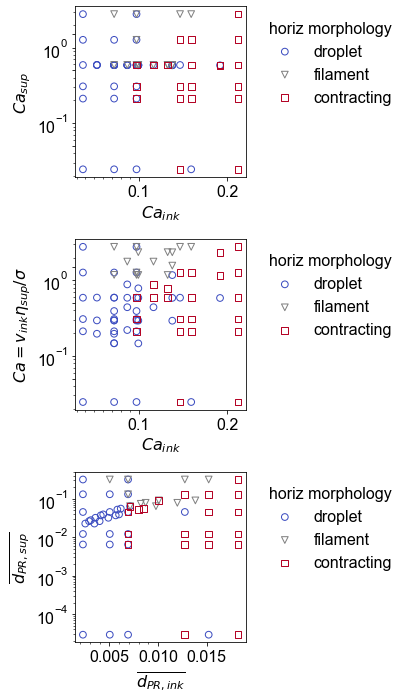

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_type=='mineral oil']
ss1['rInv'] = 2/ss1['dEst']
ss1['horiz_morphology'] = 'filament'
ss1 = ss1[ss1.horiz_segments_manual>0]
ss1.loc[ss1['horiz_totlenN']<0.9, 'horiz_morphology'] = 'contracting'
ss1.loc[ss1['horiz_segments_manual']>3,'horiz_morphology'] = 'droplet'
# ss1['morphology'] = ['droplet' if row['horiz_segments_manual']>3 else ('contracting') for i,row in ss1.iterrows()]
ss1.sort_values(by='ink_tau0', inplace=True)
x = ss1.rInv.unique()
x.sort()
fig,axs = plt.subplots(3,1, figsize=(6,10))
mp.scatterSS(ss1, 'ink_Ca', 'sup_Ca', 'horiz_morphology', dx=0, dy=0, logy=True
                 ,ax=axs[0],  legend=(i==len(ss1.ink_tau0.unique())-1), legendloc='right', fontsize=16, markersize=45, empty=True)
mp.scatterSS(ss1, 'ink_Ca', 'int_Ca', 'horiz_morphology', dx=0, dy=0, logy=True
                 ,ax=axs[1],  legend=(i==len(ss1.ink_tau0.unique())-1), legendloc='right', fontsize=16, markersize=45, empty=True)
mp.scatterSS(ss1, 'ink_dnorm', 'sup_dnorm', 'horiz_morphology', dx=0, dy=0, logy=True
                 ,ax=axs[2],  legend=(i==len(ss1.ink_tau0.unique())-1), legendloc='right', fontsize=16, markersize=45, empty=True)
for ax in axs:
    mp.setSquare(ax)
fig.tight_layout()

<ipython-input-42-ea679adca0a2>:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


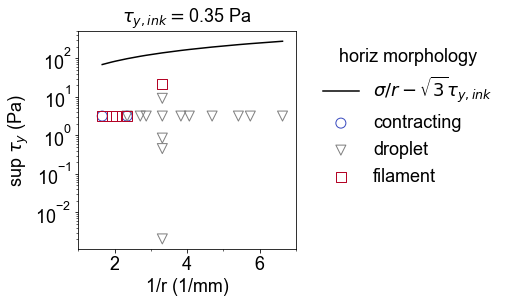

<Figure size 432x288 with 0 Axes>

In [42]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_type=='mineral oil']
ss1 = ss1[ss1.ink_val==5]
ss1['rInv'] = 2/ss1['dEst']
ss1['horiz_morphology'] = 'filament'
ss1 = ss1[ss1.horiz_segments_manual>0]
ss1.loc[ss1['horiz_totlenN']<0.9, 'horiz_morphology'] = 'contracting'
ss1.loc[ss1['horiz_segments_manual']>3,'horiz_morphology'] = 'droplet'
# ss1['morphology'] = ['droplet' if row['horiz_segments_manual']>3 else ('contracting') for i,row in ss1.iterrows()]
fig,axs = plt.subplots(1,1, figsize=(4,4), sharex=True, sharey=True)
ss1.sort_values(by='ink_tau0', inplace=True)
x = ss1.rInv.unique()
x.sort()

for i,tau in enumerate(ss1.ink_tau0.unique()):
    sigma = ss1.sigma.unique()[0]
    tst = sigma*x - np.sqrt(3)*tau
    ax = axs
    ax.plot(x,tst, color='black', label=r'$\sigma/r-\sqrt{3}\tau_{y,ink}$')
    ss2 = ss1.copy()
    ss2 = ss2[ss2.ink_tau0==tau]
    ss2 = pd.concat([ss2, 
                         pd.DataFrame([
                             {'rInv':0.1, 'sup_tau0':0.1, 'horiz_morphology':s, 'ink_tau0':tau} 
                             for s in ['droplet', 'filament', 'contracting']]
                             )])
    ss2.sort_values(by='horiz_morphology', inplace=True)
    mp.scatterSS(ss2, 'rInv', 'sup_tau0', 'horiz_morphology', dx=0, dy=0, logy=True
                 , ax = ax, legend=(i==len(ss1.ink_tau0.unique())-1), legendloc='right', fontsize=18, markersize=100, empty=True)
    ax.set_xlabel('1/r (1/mm)')
    ax.set_ylabel('')
    ax.set_title(r'$\tau_{y,ink}=$'+'{:0.2} Pa'.format(tau), fontsize=18)
axs.set_xlim([1, 7])
mp.setSquare(axs)
axs.set_ylabel(r'sup $\tau_y$ (Pa)')
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

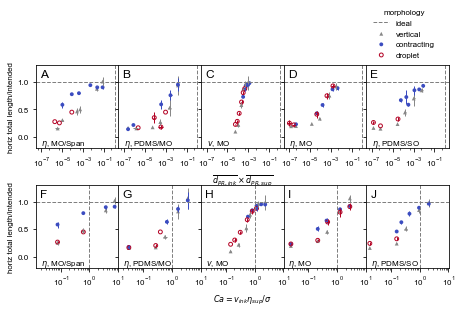

In [23]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
ss1 = me.addRatios(ss1, varlist=['dnorm'],operator='Prod')
mp.simplifyType(ss1)
ss1 = ss1.sort_values(by='sweepType')
ss1 = ss1[ss1.horiz_segments_manual>0]
ss1['morphology'] = ['droplet' if row['horiz_segments_manual']>3 else ('contracting') for i,row in ss1.iterrows()]
ss1 = ss1.sort_values(by=['morphology', 'sigma'])
ss1['vert_morphology'] = 'vertical'
me.plainTypes(ss1, abbrev=True)
fig,axs = plt.subplots(2,5, figsize=(6.5,4.25), sharex='row', sharey=True)
ms = 15
fs=8
y = -0.15
for i,st in enumerate(ss1.sweepType.unique()):
    for j,xvar in enumerate(['dnormProd', 'int_Ca']):
        kwargs = {'logx':True, 'logy':False, 'ax':axs[j][i], 'fig':fig, 'legend':((j==0) and (i==4)), 'markersize':ms, 'fontsize':fs
                  , 'set_ylabel':(i==0), 'set_xlabel':(i==2)}
        mp.scatterSS(ss1[(ss1.sweepType==st)], xvar, 'vert_hN', 'vert_morphology', dx=0.2, dy=1, color='#888888', marker='^', **kwargs)
        mp.scatterSS(ss1[(ss1.sweepType==st)], xvar, 'horiz_totlenN', 'morphology', dx=0.2, dy=1, yideal=1, xideal=1, **kwargs)
        axs[j][i].set_ylim([-0.2,1.3])
    for axi in [[axs[0], 10**-7], [axs[1],0.02]]:
        axi[0][i].text(axi[1], y, st, fontsize=fs)

for ax in axs[0]:
#     ax.set_xlim([0.5*10**-6, 3])
    mp.fixTicks(ax, True,False)
for ax in axs[1]:
#     ax.set_xlim([2*10**-2, 30])
    mp.fixTicks(ax, True,False)
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
fig.tight_layout()
plt.subplots_adjust(wspace=0)
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'line_lengths.pdf'), bbox_inches='tight', dpi=300)

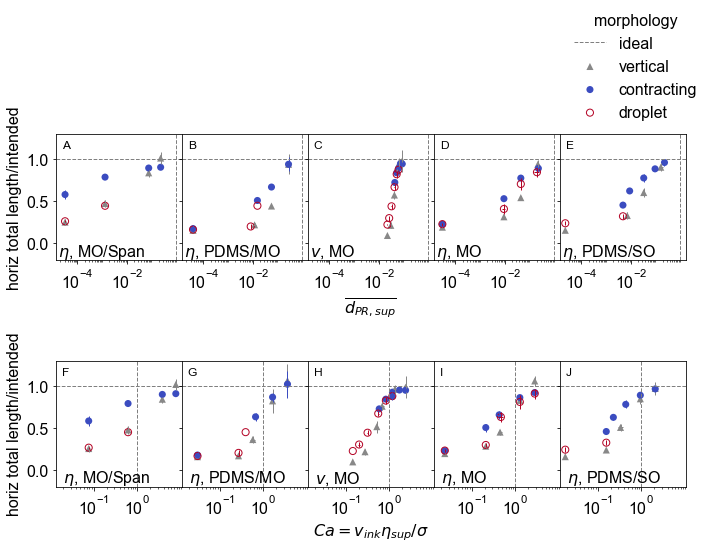

In [52]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
ss1 = me.addRatios(ss1, varlist=['dnorm'],operator='Prod')
mp.simplifyType(ss1)
ss1 = ss1.sort_values(by='sweepType')
ss1 = ss1[ss1.horiz_segments_manual>0]
ss1['morphology'] = ['droplet' if row['horiz_segments_manual']>3 else ('contracting') for i,row in ss1.iterrows()]
ss1 = ss1.sort_values(by=['morphology', 'sigma'])
ss1['vert_morphology'] = 'vertical'
me.plainTypes(ss1, abbrev=True)
fig,axs = plt.subplots(2,5, figsize=(10.5,8.25), sharex='row', sharey=True)
ms = 50
fs=16
y = -0.15
for i,st in enumerate(ss1.sweepType.unique()):
    for j,xvar in enumerate(['sup_dnorm', 'int_Ca']):
        kwargs = {'logx':True, 'logy':False, 'ax':axs[j][i], 'fig':fig, 'legend':((j==0) and (i==4)), 'markersize':ms, 'fontsize':fs
                  , 'set_ylabel':(i==0), 'set_xlabel':(i==2)}
        mp.scatterSS(ss1[(ss1.sweepType==st)], xvar, 'vert_hN', 'vert_morphology', dx=0.2, dy=1, color='#888888', marker='^', **kwargs)
        mp.scatterSS(ss1[(ss1.sweepType==st)], xvar, 'horiz_totlenN', 'morphology', dx=0.2, dy=1, yideal=1, xideal=1, **kwargs)
        axs[j][i].set_ylim([-0.2,1.3])
    for axi in [[axs[0], 10**-4.8], [axs[1],0.02]]:
        axi[0][i].text(axi[1], y, st, fontsize=fs)
    

for ax in axs[0]:
#     ax.set_xlim([0.5*10**-6, 3])
    mp.fixTicks(ax, True,False)
    ax.set_xticks([10**-4, 10**-2])
for ax in axs[1]:
#     ax.set_xlim([2*10**-2, 30])
    mp.fixTicks(ax, True,False)
    ax.set_xticks([10**-1, 10**0])
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
fig.tight_layout()
plt.subplots_adjust(wspace=0)
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'line_lengths.png'), bbox_inches='tight', dpi=300)

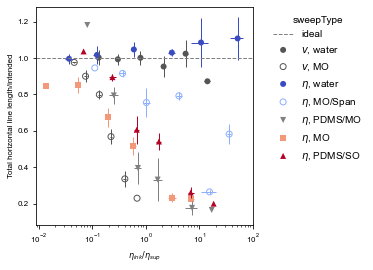

<Figure size 432x288 with 0 Axes>

In [47]:
ss1 = ss.copy()
mp.simplifyType(ss1)
ss1 = ss1[ss1.ink_type!='PEGDA_40']
ss1.sort_values(by='sigma', inplace=True)
fig,ax = plt.subplots(1,1)
me.plainTypes(ss1)
mp.sweepTypeSS(ss1, 'viscRatio', 'horiz_totlenN', logx=True, yideal=1, dx=0.2 ,ax=ax, legendloc='right')
ax.set_xlabel('$\eta_{ink}/\eta_{sup}$')
ax.set_ylabel('Total horizontal line length/intended')
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'viscRatio_totlenN.pdf'), bbox_inches='tight', dpi=300)

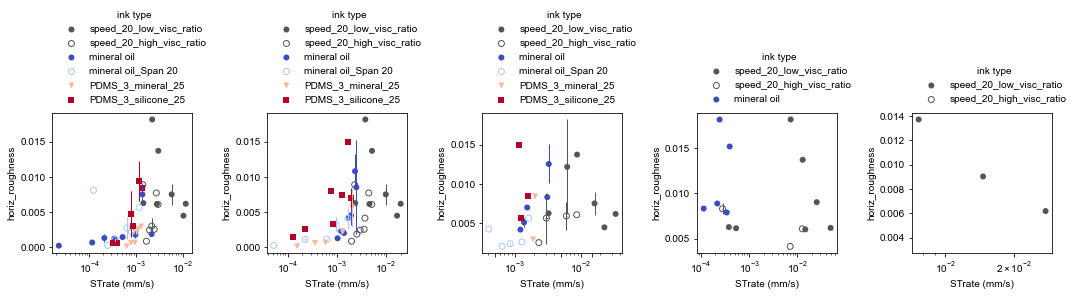

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [42]:
ssca = ss.copy()
ssca = ssca[ssca.sigma>0]
ssca.sort_values(by='sigma')
ssca = ssca[ssca.horiz_roughness_SE<0.1]
ssca = ssca[ssca.horiz_segments_manual==3]

u['STrate'] = 'mm/s'
fig,axs = plt.subplots(1, 5, figsize=(15, 4))
for i, ki in enumerate([-3.5, -3.25, -3, -2.75, -2.5]):
    k = 10**ki
    ssca['STrate'] = (k*ssca['ink_v']*(ssca['sup_visc0']-ssca['ink_visc0'])-k**3*ssca['sigma']/(ssca['dEst']/1000)**2)/(ssca['ink_visc0']+ssca['sup_visc0'])
    mp.sweepTypeSS(ssca, 'STrate', 'horiz_roughness', ax=axs[i], logx=True, units=u)
fig.tight_layout()